<span style="color:CornflowerBlue">
# DATASCI W261: Machine Learning at Scale 
**Generic Solution   
W261-1 Fall 2015   
Week 10: Homework   
November 17, 2015** 
</span>
<BR><span style="color:firebrick; font-size: 120%;"><b>
Student name: <BR>
Student email:
Homework 10 | Due: November 18th 2015 <BR>
 Submitted on:
DATE: <BR> 
TIME:<BR>
</b></span>

# HW 10.0: Short answer questions
> What is Apache Spark and how is it different from Apache Hadoop? 

Apache Spark is an open source cluster computing framework used in applications for performing data operations. Apache Spark does not require Hadoop but supports data systems implementing the Hadoop API. It can create distributed datasets from any file stored in HDFS. 

Apache Spark processes data in-memory while Hadoop MapReduce persists back to the disk after a map or reduce action. This enables performance of Apache Spark to be 100 times faster than the performance of Apache Hadoop in certain cases. 

Apache Spark has 80+ data operations in comparison to just 1 for Apache Hadoop (it only has the MapReduce operation). Apache Spark is designed to be more general to support a wide variety of workloads. This enables Spark to be easy and inexpensive at combining varying optimized processing types in the pipeline. This in turn reduces management overhead on separate tools. 

Apache Spark is also easier to program than Apache Hadoop. This allows more complex data agorithms to be created with less effort. 

Hadoop as a big data processing technology has been around for 10 years and has proven to be the solution of choice for processing large data sets. MapReduce is a great solution for one-pass computations, but not very efficient for use cases that require multi-pass computations and algorithms. Each step in the data processing workflow has one Map phase and one Reduce phase and you'll need to convert any use case into MapReduce pattern to leverage this solution. The Job output data between each step has to be stored in the distributed file system before the next step can begin. Hence, this approach tends to be slow due to replication & disk storage. Also, Hadoop solutions typically include clusters that are hard to set up and manage. It also requires the integration of several tools for different big data use cases (like Mahout for Machine Learning and Storm for streaming data processing). If you wanted to do something complicated, you would have to string together a series of MapReduce jobs and execute them in sequence. Each of those jobs was high-latency, and none could start until the previous job had finished completely.

Spark allows programmers to develop complex, multi-step data pipelines using directed acyclic graph (DAG) pattern. It also supports in-memory data sharing across DAGs, so that different jobs can work with the same data.



> Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, ...... languages (list languages). 



Spark API consists of interfaces to develop applications based on it in Java, **Scala, Python, R, and SQL.**

>Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or ????? in a distributed manner.

Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or **Yarn** in a distributed manner.

> What is an RDD and show a fun example of creating one and bringing the first element back to the driver program.

RDD stands for "Resilient Distributed Dataset." It is one of the the key data structures in Spark that is used to store a collection of data items that can be distributed across multiple computing nodes. An RDD in Spark an immutable,  fault tolerant collection of elements that can be partitioned and operated in parallel.  Each record in an RDD consists of key-value pair (known as a paired RDD) or of just a value only. RDDs can contain any type of Python, Java, or Scala objects, including user-defined classes. RDDs can be manipulated in a parallel fashion and it is the main programming abstraction for Spark. The RDD has a rich API that supports many actions and transformations that can be performed on it such as map, reduce, filter, reduceByKey, and numerous others.  


Here we show a simple example where we create an RDD with ten alphanumeric 5-character sets using numbers 1,2,3 and letters a,b,c. Then we bring back the first element of the RDD. 

In [2]:
import os
import sys #current as of 9/26/2015
spark_home = os.environ['SPARK_HOME'] = \
    '/Users/jshanahan/Dropbox/Lectures-UC-Berkeley-ML-Class-2015/spark-1.5.0-bin-hadoop2.6/'
    

if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.8.2.1-src.zip'))
execfile(os.path.join(spark_home,'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.5.0
      /_/

Using Python version 2.7.10 (default, May 28 2015 17:04:42)
SparkContext available as sc, HiveContext available as sqlContext.


In [2]:
rdd = sc.parallelize([1,2,3,4])
rdd.take(2)

[1, 2]

In [3]:
#adapted from code in http://stackoverflow.com/questions/2257441/random-string-generation-with-upper-case-letters-and-digits-in-python
import string
import random
import numpy as np

#function to create random characters taking size of character set and alphanumeric characters as inputs
def id_generator(size=5, chars=string.ascii_uppercase + string.digits):
    return ''.join(random.choice(chars) for _ in range(size))

#create 10 random 5-character sets
dataRDD = sc.parallelize([id_generator(5, "123abc") for i in range(10)])
#bring first element back to driver
dataRDD.take(1)


['cc12c']

> What is lazy evaluation and give an intuitive example of lazy evaluation and comment on the massive computational savings to be had from lazy evaluation.

Lazy evaluation is a strategy in Spark (and in some other programming paradigms) where the evaluation of an expression is delayed until the value is needed. In the context of Spark, there are typically two types of operation on the RDDs: "manipulation" and "action."  RDDs are only created and evaluated when "action" steps occur. 

For example, here are two lines of typical operations on an RDD: 

*exampleRDD = sc.parallelize([1,2,3... 10e9]).filter(lambda x: x%10 == 0).map(lambda x: x+1)  
... other instructions  
... other instructions  
exampleRDD.collect()*

In the first line, the "filter" and "map" functions are both transformation steps, and therefore the expression is not evaluated yet. The RDD is only evaluated, created, and mapped with "x+1" after the line where "collect()" is called because "collect()" is an action step. 

Lazy evaluation presents massive computational savings for a couple of main reasons. First of all, the large list of data [1,2,3... 10e9] does not need to be loaded right away. It is only being evaluated when it is needed by the computing node as the second "action" step occurs. Therefore, this frees up memory for the node to perform other work. Secondly, Spark optimizes the data operation. In this example, Spark will know that there is a "filter" operation, which means not all the data need to be loaded to be processed by the "map" function. This represents large memory savings when compared to loading all the data all at once in the "parallelize" function without lazy evaluation. 

# HW 10.1
## HW 10.1.0
>In Spark, write the code to count how often each word appears in a text document (or set of documents). Please use this homework document as the example document to run an experiment.  Report the following: provide a sorted list of tokens in decreasing order of frequency of occurence.

In [44]:
# driver function for HW10.1
def hw_10_1():
    # read in the text file
    tf = sc.textFile("MIDS-MLS-HW-10.txt")
    
    # transform the RDD
    # first, break out the tokens
    # filter out tokens that aren't alphanumeric (we're only counting words)
    # append a value of 1 to each token, reduce and take sums
    # finally, swap key and value and sort using the new key (total counts)
    counts = tf.flatMap(lambda line: line.strip().split()) \
        .filter(lambda x: x.isalpha()) \
        .map(lambda word: (word, 1)) \
        .reduceByKey(lambda a, b: a + b) \
        .sortBy(lambda x: x[1], False)
        #.map(lambda (x,y): (y,x)) \
        #.sortByKey(ascending=False)
    
    # collect the results and print
    data = counts.take(50)
    for item in data:
        print item
    
hw_10_1()

(u'the', 44)
(u'and', 23)
(u'of', 17)
(u'in', 17)
(u'a', 11)
(u'code', 9)
(u'to', 9)
(u'data', 8)
(u'for', 7)
(u'with', 7)
(u'is', 7)
(u'Using', 7)
(u'on', 7)
(u'KMeans', 6)
(u'your', 6)
(u'from', 5)
(u'this', 5)
(u'as', 5)
(u'What', 4)
(u'Sum', 4)
(u'Comment', 4)
(u'Squared', 4)
(u'each', 4)
(u'linear', 4)
(u'Set', 4)
(u'example', 4)
(u'HW', 4)
(u'clusters', 4)
(u'words', 3)
(u'report', 3)
(u'lazy', 3)
(u'training', 3)
(u'count', 3)
(u'following', 3)
(u'Spark', 3)
(u'model', 3)
(u'Errors', 3)
(u'results', 3)
(u'Within', 3)
(u'x', 3)
(u'import', 3)
(u'after', 3)
(u'plot', 3)
(u'it', 3)
(u'an', 3)
(u'regression', 3)
(u'document', 3)
(u'provided', 3)
(u'using', 3)
(u'Apache', 2)


###An alternative approach using the command line and an alternative sort


In [38]:

%%writefile spark_wc.py
import sys
from operator import add
from pyspark import SparkContext
import operator


if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Usage: spark_wc.py <file>")
        exit(-1)
        
    sc = SparkContext(appName="PythonWordCount")

    lines = sc.textFile(sys.argv[1], 1)
    
    # Split the lines by space
    # take each item and output <item, 1>
    # reduce by <item> and add them up
    # sort in reverse order by value
    counts = lines.flatMap(lambda x: x.split(' ')) \
                  .map(lambda x: (x, 1)) \
                  .reduceByKey(add) \
                  .sortBy(lambda x: -x[1]) 

    output = counts.collect()
    
    for (word, count) in output:
        print("%s: %i" % (word, count))

    sc.stop()

Overwriting spark_wc.py


In [ ]:
!python spark_wc.py MIDS-MLS-HW-10.txt |head -10

## HW 10.1.1
> Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again, sort the output words in decreasing order of frequency. 




In [4]:
# driver function for HW10.1.1
def hw_10_1_1():
    # read in the text files
    tf = sc.textFile("MIDS-MLS-HW-10.txt")
    
    # transform the RDD
    # first, break out the tokens
    # filter out tokens that aren't alphanumeric or start with uppercase letter
    # append a value of 1 to each token, reduce and take sums
    # finally, swap key and value and sort using the new key (total counts)
    counts = tf.flatMap(lambda line: line.strip().split(' ')) \
        .filter(lambda x: x.isalpha() and len(x) > 0 and x[0].islower()) \
        .map(lambda word: (word, 1)) \
        .reduceByKey(lambda a, b: a + b) \
        .map(lambda (x,y): (y,x)) \
        .sortByKey(ascending=False)
    
    # collect the results and print
    data = counts.take(50)
    for item in data:
        print item
    
hw_10_1_1()


(44, u'the')
(23, u'and')
(17, u'of')
(17, u'in')
(11, u'a')
(9, u'code')
(9, u'to')
(8, u'data')
(7, u'is')
(7, u'for')
(7, u'with')
(7, u'on')
(6, u'your')
(5, u'from')
(5, u'this')
(5, u'as')
(4, u'clusters')
(4, u'each')
(4, u'linear')
(4, u'example')
(3, u'training')
(3, u'lazy')
(3, u'words')
(3, u'report')
(3, u'count')
(3, u'following')
(3, u'model')
(3, u'results')
(3, u'using')
(3, u'import')
(3, u'plot')
(3, u'it')
(3, u'an')
(3, u'regression')
(3, u'document')
(3, u'provided')
(3, u'after')
(3, u'x')
(2, u'iterations')
(2, u'evaluation')
(2, u'available')
(2, u'run')
(2, u'word')
(2, u'here')
(2, u'list')
(2, u'found')
(2, u'set')
(2, u'testing')
(2, u'vector')
(2, u'between')


# HW 10.2: KMeans a la MLLib
>Use the provided MLlib-centric KMeans code snippet.  
NOTE:  kmeans_data.txt is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0   
Run the code snippet and list the clusters that you find and compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.

## Comment for HW10.2 results:
We have experiemented with several values of k and number of iterations. We found that increasing k would help to decrease the WSSSE. In fact, you would get a minial WSSSE of 0 when you have k>=6 because there are only 6 data points and each data point becomes the centroid. However, just by eye-balling the data, there are two distinct clusters. Therefore, we used k=2 for our final run. Any value of k greater than 2 would decrease the bias in the model but likely increase the variance when we run in similar datasets. 

Secondly, we stopped iterating at around 10 iterations. The number of iterations does not really matter since with such a small number of data points, 1 iteration is enough to reach the same result. 

<P>** NOTE: 

The MLlib implementation includes a parallelized variant of the k-means++ method called kmeans||. The implementation in MLlib has the following parameters:

k is the number of desired clusters.
maxIterations is the maximum number of iterations to run.
initializationMode specifies either random initialization or initialization via k-means||.
runs is the number of times to run the k-means algorithm (k-means is not guaranteed to find a globally optimal solution, and when run multiple times on a given dataset, the algorithm returns the best clustering result).
initializationSteps determines the number of steps in the k-means|| algorithm.
epsilon determines the distance threshold within which we consider k-means to have converged.
initialModel is an optional set of cluster centers used for initialization. If this parameter is supplied, only one run is performed.

K=1, WSSSE=46.7653718044, Centers=[array([ 4.6,  4.6,  4.6])]
K=2, WSSSE=0.692820323028, Centers=[array([ 0.1,  0.1,  0.1]), array([ 9.1,  9.1,  9.1])]
K=3, WSSSE=0.519615242271, Centers=[array([ 9.15,  9.15,  9.15]), array([ 9.,  9.,  9.]), array([ 0.1,  0.1,  0.1])]
K=4, WSSSE=0.346410161514, Centers=[array([ 9.15,  9.15,  9.15]), array([ 0.05,  0.05,  0.05]), array([ 9.,  9.,  9.]), array([ 0.2,  0.2,  0.2])]
K=5, WSSSE=0.173205080757, Centers=[array([ 9.,  9.,  9.]), array([ 9.1,  9.1,  9.1]), array([ 9.2,  9.2,  9.2]), array([ 0.05,  0.05,  0.05]), array([ 0.2,  0.2,  0.2])]


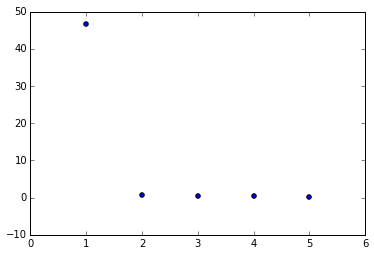

In [40]:
from pyspark.mllib.clustering import KMeans, KMeansModel 
from numpy import array 
from math import sqrt

data = sc.textFile("kmeans_data.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))


def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = []
K = []
for k in range(1,6):
    clusters = KMeans.train(parsedData, k, maxIterations=10, runs=10, initializationMode="random")
    residual = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    WSSSE.append(residual)
    K.append(k)
    print("K={0}, WSSSE={1}, Centers={2}".format(k, str(residual),clusters.centers))
    

pylab.scatter(K,WSSSE)
pylab.show()
    
clusters.save(sc, "cluster_model_1")
cluster_model_1 = KMeansModel.load(sc, "cluster_model_1")
#predictions = cluster_model_1.predictAll(testdata)

# HW 10.3

> Download the following KMeans notebook:

> https://www.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb?dl=0

> Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmeans implementation on this data and report your results as follows:

>   -- plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
  -- in each plot please report the Within Set Sum of Squared Errors for the found clusters. Comment on the progress of this measure as the Kmeans algorithm runs for more iterations



## Comment for 10.3 results:
In our final output, the WSSSE starts off at a larger value as the starting 3 centroid approximations are not at the center of mass of the 3 clusters but at 3 randomly chosen points. After 10 iterations or more, the WSSSE reaches the same minimal value. The WSSSE does not decrease with any more iterations. This is because within 10 iterations, the 3 centroid approximations become the center of mass at the 3 clusters - the centroid locations with minimal WSSSE for unweighted k-means. And further iterations do not update the centroids to any new positions.

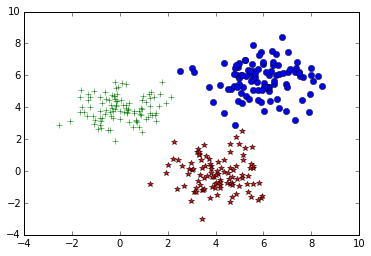

In [25]:
#Generate 100 points for 3 clusters
%matplotlib inline
import numpy as np
import pylab 
import json
size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

#plot the cluster
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

centroids after 1 iterations:
[ 3.28744534 -0.8909221 ]
[ 2.83233061  1.18376825]
[ 3.6561816   5.18819806]
Within Set Sum of Squared Error = 758.445444872


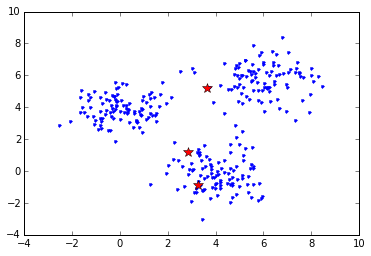

centroids after 10 iterations:
[ 5.96815596  5.73491635]
[ 0.0447896   3.96005902]
[ 4.06561158 -0.18396329]
Within Set Sum of Squared Error = 375.403482707


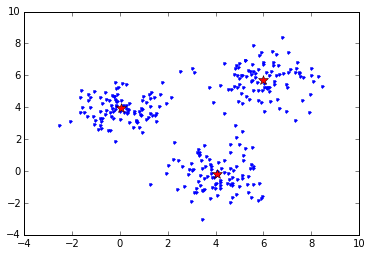

centroids after 20 iterations:
[ 0.0447896   3.96005902]
[ 5.96815596  5.73491635]
[ 4.06561158 -0.18396329]
Within Set Sum of Squared Error = 375.403482707


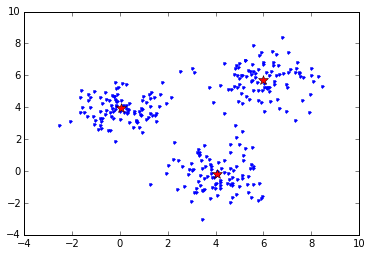

centroids after 100 iterations:
[ 4.06561158 -0.18396329]
[ 5.96815596  5.73491635]
[ 0.0447896   3.96005902]
Within Set Sum of Squared Error = 375.403482707


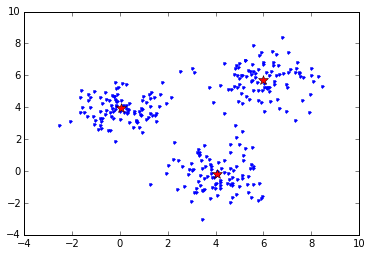

In [31]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

#plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()
    
# Evaluate clustering by computing Within Set Sum of Squared Errors
def get_error(point, means):
    error = np.sum((point - means)**2, axis=1).min()**0.5
    return (error)

def hw_10_3(data, iterations=10):
    parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))
    # Build the model (cluster the data)
    ml_clusters = KMeans.train(parsedData, 3, maxIterations=iterations, runs=iterations, 
                               initializationMode="random")
    
    print "centroids after %d iterations:" %iterations
    for centroid in ml_clusters.centers:
        print centroid

    # calculate WSSSE
    sum_errors = parsedData.map(lambda point: get_error(point, ml_clusters.centers)) \
                .reduce(lambda x, y: x + y)
        
    print("Within Set Sum of Squared Error = " + str(sum_errors))
    plot_iteration(ml_clusters.centers)

# Load and parse the data
data = sc.textFile("data.csv").cache()
# run k-means for 1, 10, 20, and 100 iterations
hw_10_3(data, 1)
hw_10_3(data, 10)
hw_10_3(data, 20)
#hw_10_3(data, 100)

# HW 10.4
>Using the KMeans code (homegrown code) provided repeat the experiments in HW10.3. Comment on any differences between the results in HW10.3 and HW10.4. Explain.

## Comment on difference in results between HW10.3 and HW10.4
The results are essentially the same between using MLlib in HW10.3 and using the home grown code in HW10.4. They both converge to the same WSSSE within 10 iterstions. 

The only difference is when the number of iterations is 1. At that point, since HW10.3 and HW10.4 start at a different randomly selected points, the first WSSSE has a big difference. But, this WSSSE difference will be eliminated within a few iterations. 

HW10.3 completed a lot faster than HW10.4. This shows that MLLIB library of Spark is better written that executes faster.

**NOTE: time and  report timing for both approaches ** TODO

Starting random centroids [array([ 3.32052128, -0.27085626]), array([ 4.39271075,  0.423544  ]), array([ 2.59875383, -1.59153592])]
Iteration 1

Centroids:
[[ 1.03069719  2.54320376]
 [ 5.23271051  4.08599837]
 [ 2.711467   -1.32299475]]

Within Set Sum of Squared Error = 629.872005504


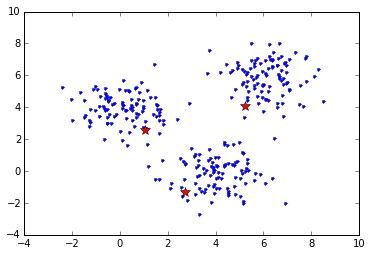

Iteration 10

Centroids:
[[ 0.15988685  3.95889005]
 [ 6.10565868  5.90596587]
 [ 4.04560066 -0.12272147]]

Within Set Sum of Squared Error = 379.526641771


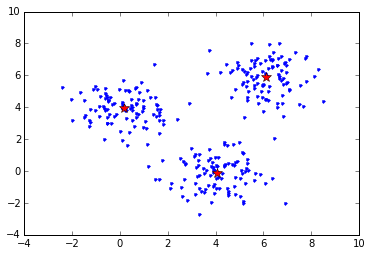

Iteration 30

Centroids:
[[ 0.15988685  3.95889005]
 [ 6.10565868  5.90596587]
 [ 4.04560066 -0.12272147]]

Within Set Sum of Squared Error = 379.526641771


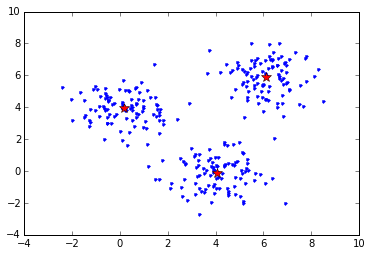

Iteration 100

Centroids:
[[ 0.15988685  3.95889005]
 [ 6.10565868  5.90596587]
 [ 4.04560066 -0.12272147]]

Within Set Sum of Squared Error = 379.526641771


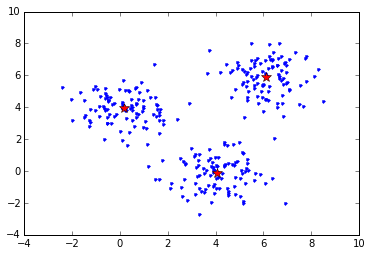

In [9]:
from numpy import array
from math import sqrt
import pylab 

#Get centroid from text file
def get_centroid(line):
    return np.array([float(f) for f in line.split(',')])

#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

#Calculate Within Set Sum of Squared Errors (WSSSE)
def error(point, centroids): 
    center = centroids[point[0]]
    return sqrt(sum([x**2 for x in (point[1][0] - center)]))

##Useful functions for plotting centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

K = 3

iterations = [1,10,30,100]

D = sc.textFile("./data.csv").cache()
iter_num = 1

# Initialization: get a sample of 3 random points as startin centroids
centroids = D.map(get_centroid).takeSample(False,3)
# centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])
print 'Starting random centroids',centroids

for i in range(100):  

    nearestCentroidRDD = D.map(nearest_centroid)

    res = nearestCentroidRDD.reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    #example res output: [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)  ), ... 
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
#     if np.sum(np.absolute(centroids_new-centroids))<0.01:
#         break
    centroids = centroids_new

    if i+1 in iterations:
        print "====================="
        print "Iteration " + str(i+1)
        iter_num = iter_num + 1 
        print '\nCentroids:'
        print centroids
        
        WSSSE  = nearestCentroidRDD.map(lambda point: error(point,centroids)).reduce(lambda x, y: x + y)
        print("\nWithin Set Sum of Squared Error = " + str(WSSSE))
        plot_iteration(centroids)

# print "Final Results:"
# print centroids


# HW 10.5 (OPTIONAL)
>Using the KMeans code provided, modify it to do a weighted KMeans and repeat the experiements in HW10.3. Comment on any differences between the results in HW10.3 and HW10.5. Explain.

>NOTE: Weight each example as follows using the inverse vector length (Euclidean norm): 

>weight(X)= 1/||X||, 

>where ||X|| = SQRT(X.X)= SQRT(X1^2 + X2^2)

>Here X is vector made up of X1 and X2.

## Comment on difference in results between HW10.3 and HW10.5
The starting WSSSE is slightly larger for HW10.5 after 10 iterations in comparison to that of HW10.3. One of the main reasons is that HW10.3's model uses unweighted k-means, which means that each predicted centroid is iterating to the middle of the center of each cluster with minimal WSSSE. For the weighted case in k-means, each predicted centroid is not iterating towards a slightly different center, since the center of mass of each cluster is distorted by the uneven weight (points further away from the origin are weighted less). This results in a slightly higher WSSSE when compared to the minimal WSSSE case in HW10.3. 

One more observation is that we can compare HW10.4 and HW10.5 even more closely because we can set the same starting random centroid point. We noticed that the WSSSE decreases faster in the weighted k-means case after one iteration, when compared to that of the unweighted case in HW10.4.

Starting random centroids [[ 5.31809442  6.10232186]
 [ 3.87691756 -1.53534767]
 [ 7.46960828  7.88530326]]
Iteration 1

Centroids:
[[ 2.21890496  4.64474408]
 [ 2.91184653  0.41193696]
 [ 7.05108106  7.00263438]]

Within Set Sum of Squared Error = 589.375860251


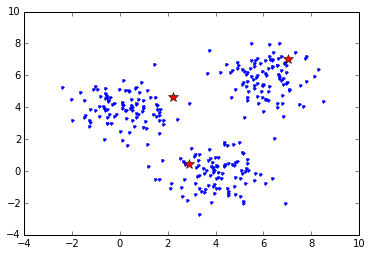

Iteration 10

Centroids:
[[ 0.17315904  3.72839126]
 [ 3.69217474 -0.11867877]
 [ 6.03761671  5.82225451]]

Within Set Sum of Squared Error = 386.677432326


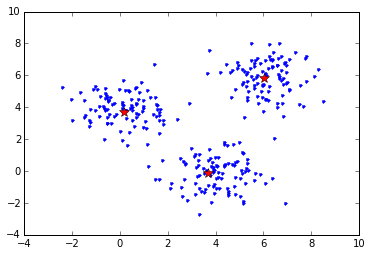

Iteration 30

Centroids:
[[ 0.17315904  3.72839126]
 [ 3.69217474 -0.11867877]
 [ 6.03761671  5.82225451]]

Within Set Sum of Squared Error = 386.677432326


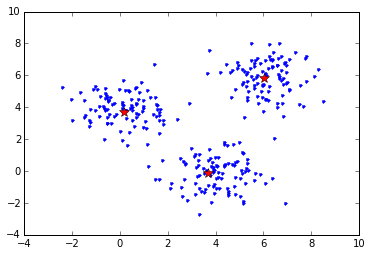

Iteration 100

Centroids:
[[ 0.17315904  3.72839126]
 [ 3.69217474 -0.11867877]
 [ 6.03761671  5.82225451]]

Within Set Sum of Squared Error = 386.677432326


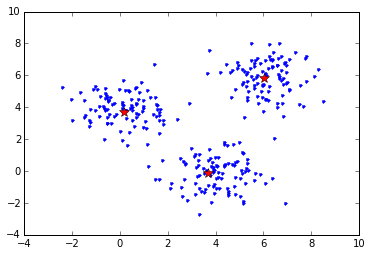

In [10]:
import numpy as np
from math import sqrt
import pylab 

#Get centroid from text file
def get_centroid(line):
    return np.array([float(f) for f in line.split(',')])

#Calculate which class each data point belongs to
def nearest_centroid(pt,centroids):    
    closest_centroid_idx = np.sum((pt - centroids)**2, axis=1).argmin()    
    #apply weight on data
    w = 1/sqrt(pt[0]**2+pt[1]**2)    
    return (closest_centroid_idx,(pt,w*pt,w))

#Calculate Within Set Sum of Squared Errors (WSSSE)
def error(point, centroids): 
    center = centroids[point[0]]
    return sqrt(sum([x**2 for x in (point[1][0] - center)]))

#Useful functions for plotting centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

K = 3

iterations = [1,10,30,100]

D = sc.textFile("./data.csv").cache()
iter_num = 1

# Initialization: get a sample of 3 random points as startin centroids
points = D.map(get_centroid)
# centroids = points.takeSample(False,3)
#use same starting centroids as that in hw 10.4
centroids = np.array([[ 5.31809442,  6.10232186], [ 3.87691756, -1.53534767], [ 7.46960828,  7.88530326]])
print 'Starting random centroids',centroids

for i in range(100):

    nearestCentroidRDD = points.map(lambda pt: nearest_centroid(pt,centroids))    
    res = nearestCentroidRDD.reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2])).collect()

    #example res output: [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)  ), ... 
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    
    centroids_new = np.array([x[1][1]/(x[1][2]) for x in res])  #divide by cluster size
#     if np.sum(np.absolute(centroids_new-centroids))<0.01:
#         break
    centroids = centroids_new

    if i+1 in iterations:
        print "====================="
        print "Iteration " + str(i+1)
        iter_num = iter_num + 1 
        print '\nCentroids:'
        print centroids
        
        WSSSE  = nearestCentroidRDD.map(lambda point: error(point,centroids)).reduce(lambda x, y: x + y)
        print("\nWithin Set Sum of Squared Error = " + str(WSSSE))
        plot_iteration(centroids)


# HW 10.6: Linear Regression (OPTIONAL)
## HW 10.6.1
>Using the following linear regression notebook:

> https://www.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb?dl=0 

>Generate 2 sets of data with 100 data points using the data generation code provided and plot each in separate plots. Call one the training set and the other the testing set.

>Using MLLib's LinearRegressionWithSGD to train up a linear regression model with the training dataset and evaluate it with the testing set. 

>Whats a good number of iterations for training the linear regression model? Justify with plots and words. 

## Comments on Number of Iterations
After 8 iterations, the Mean Squared Error (MSE) change is less than 0.5%. Therefore, 8 iterations is a sufficiently good number of iterations for the given dataset. Also, you can see in the plot below that after 8 iterations the line almost overlaps with the True line. 

### Data Generation

In [11]:
import numpy as np
import csv
def data_generate(fileName, w=[0,0], size=100):
#     np.random.seed(0)
    x = np.random.uniform(-4, 4, size)
    noise = np.random.normal(0, 2, size)
    y = (x * w[0] + w[1] + noise)
    data = zip(y, x)
    with open(fileName,'wb') as f:
        writer = csv.writer(f)
        for row in data:
            writer.writerow(row)
    return True

In [12]:
#Generate two set of 100-point dataset with true being y=8x-2
w = [8,-2]
data_generate('data_lr_train.csv', w, 100)
data_generate('data_lr_test.csv', w, 100)

True

### Plot train and test data

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
def dataPlot(file, title,w):
    with open(file, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            plt.plot(float(row[1]), float(row[0]),'o'+'r')
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    x = [-4, 4]
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x,y, linewidth=2.0)
    plt.grid()
    plt.show()

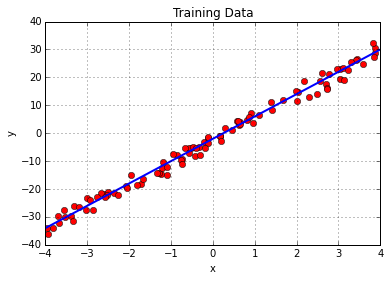

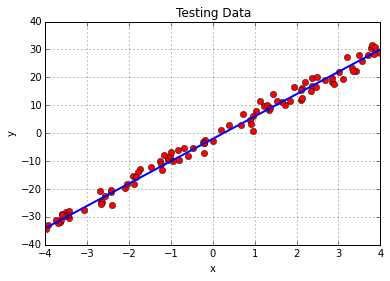

In [14]:
dataPlot('data_lr_train.csv','Training Data',w)
dataPlot('data_lr_test.csv','Testing Data',w)

#### Now run Linear Regression using MLLib function

In [4]:
import numpy as np
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel

# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint(values[0], values[1:])

data_train = sc.textFile("data_lr_train.csv")
parsedData = data_train.map(parsePoint)

prev_squared_error = 0.0
squared_error = 99999

iteration = 0
while True:
    prev_squared_error=squared_error
    iteration+=1
    # Build the model and find weight/intercept of model
    model = LinearRegressionWithSGD.train(parsedData, step=0.5, intercept=True, iterations=iteration)
    
    w = np.array([model.weights[0],model.intercept])

    data_test = sc.textFile("data_lr_test.csv").map(lambda line: [float(v) for v in line.split(',')]+[1.0]).cache()
    n = data_test.count()
    squared_error = data_test.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    
    print "Mean Squared Error after "+str(iteration)+" iterations: " + str(squared_error/n)
    if abs(squared_error/prev_squared_error - 1) < 0.005: break
#     if iteration==50: break
        
print '==============\nFinal Result:\n Tolerance reached after '+str(iteration)+' iterations:'
print 'The linear regression model can be described as: '+str(model)
print 'Mean Squared Error is: '+str(squared_error/n)
    

Mean Squared Error after 1 iterations: 1207.77569389
Mean Squared Error after 2 iterations: 1386.25242688
Mean Squared Error after 3 iterations: 648.738986611
Mean Squared Error after 4 iterations: 146.514405587
Mean Squared Error after 5 iterations: 16.846124159
Mean Squared Error after 6 iterations: 5.41577954858
Mean Squared Error after 7 iterations: 4.68357538881
Mean Squared Error after 8 iterations: 4.68962024262
Final Result:
 Tolerance reached after 8 iterations:
The linear regression model can be described as: (weights=[7.8964353169], intercept=-2.0218075826128183)
Mean Squared Error is: 4.68962024262


### Calculating Mean Squared Error for 2,4,6 and 8 iterations and plotting the resulting lines

In [35]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel

def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint(values[0], values[1:])


def iterationsPlot(trainFileName,testFileName,truew):
    x = [-4, 4]
    
    w = truew
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'b', label="True line", linewidth=4.0)
    
    data = sc.textFile(testFileName).map(lambda line: [float(v) for v in line.split(',')]+[1.0]).cache()
        
    trainData = data_train.map(parsePoint)

    n = data.count()
    
    np.random.seed(400)
    w = np.random.normal(0,1,2)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'r--', label="After 0 Iterations", linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 0 iterations: " + str(squared_error/n)

    model = LinearRegressionWithSGD.train(trainData, step=0.5, intercept=True, iterations=2)
    w = np.array([model.weights[0],model.intercept])
    #w = linearRegressionGD(data, w, iterations=2)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'g--', label="After 2 Iterations", linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 2 iterations: " + str(squared_error/n)

    model = LinearRegressionWithSGD.train(trainData, step=0.5, intercept=True, iterations=4)
    w = np.array([model.weights[0],model.intercept])
    #w = linearRegressionGD(data, w, iterations=4)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'm--', label="After 4 Iterations", linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 4 iterations: " + str(squared_error/n)
    
    model = LinearRegressionWithSGD.train(trainData, step=0.5, intercept=True, iterations=6)
    w = np.array([model.weights[0],model.intercept])
    #w = linearRegressionGD(data, w, iterations=2)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'y--', label="After 6 Iterations", linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 6 iterations: " + str(squared_error/n)
    
    model = LinearRegressionWithSGD.train(trainData, step=0.5, intercept=True, iterations=8)
    w = np.array([model.weights[0],model.intercept])
    #w = linearRegressionGD(data, w, iterations=2)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'y--', label="After 8 Iterations", linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 8 iterations: " + str(squared_error/n)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

Mean Squared Error after 0 iterations: 433.927792256
Mean Squared Error after 2 iterations: 1386.25242688
Mean Squared Error after 4 iterations: 146.514405587
Mean Squared Error after 6 iterations: 5.41577954858
Mean Squared Error after 8 iterations: 4.68962024262


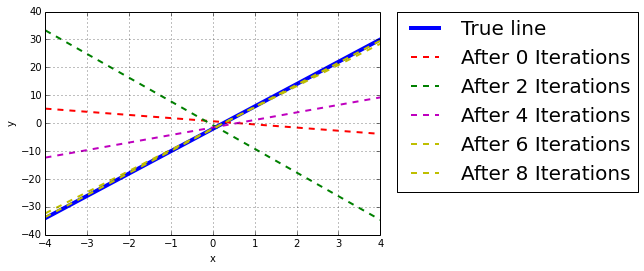

In [36]:
iterationsPlot('data_lr_train.csv','data_lr_test.csv',[8, -2])

## HW 10.6.2
>In the notebook provide, in the cell labeled "Gradient descent (regularization)".

>Fill in the blanks and get this code to work for LASSO and RIDGE linear regression.

>Using the data from 10.6.1 tune the hyper parameters of your LASS0 and RIDGE regression. Report your findings with words and plots.


## Report of Findings
For tuning the regularization parameter, we tried three different values:  0.05, 0.10, and 0.50. 

We found that for Ridge Regression, the smaller regularization parameter values of 0.05 and 0.10 caused the model to converge faster than the highest value of 0.50.

Interestingly, we found that the middle value, 0.10, provided significantly faster convergence for Lasso Regression compared to the smaller and larger values.

Please see the contour plots below for convergence of the models.

In [33]:
import numpy as np

    
def linearRegressionGDReg(data, wInitial=None, learningRate=0.05, iterations=50, regParam=0.01, regType=None):
    
    betaZeros = []
    betaOnes = []

    
    featureLen = len(data.take(1)[0])
    n = data.count()
    if wInitial is None:
        w = np.random.normal(size=featureLen) # w should be broadcasted if it is large
    else:
        w = wInitial
        
    betaZeros.append(w[0])
    betaOnes.append(w[1])

    for i in range(iterations):
        wBroadcast = sc.broadcast(w)
        gradient = data.map(lambda d: -2 * (d[0] - np.dot(wBroadcast.value, np.concatenate((np.array([1]), np.array(d[1:]))))) * np.concatenate((np.array([1]), np.array(d[1:])))) \
                       .reduce(lambda a,b: a + b)        
        if regType == "Ridge":
            wReg = w
        elif regType == "Lasso":
            wReg = np.zeros(w.shape[0])
            for i in range(w.shape[0]):
                if w[i] > 0:
                    wReg[i] = 1
                elif w[i] < 0:
                    wReg[i] = -1
                else:
                    wReg[i] = 0
        else:
            wReg = np.zeros(w.shape[0])
        gradient = gradient + regParam * wReg  #gradient:  GD of Squared Error+ GD of regularized term 
        w = w - learningRate * gradient / n
    
        betaZeros.append(w[0])
        betaOnes.append(w[1])

    return w, betaZeros,betaOnes

### Running Ridge Regression

In [34]:
np.random.seed(400)

def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return values

data_train = sc.textFile("data_lr_train.csv")
parsedData = data_train.map(parsePoint)

finalBetas, allBetaZeros,allBetaOnes = linearRegressionGDReg(parsedData, 
                                                             iterations=50, 
                                                             learningRate = 0.05, 
                                                             regParam=0.1, 
                                                             regType="Ridge")
#print final betas [Coefficient, Beta_1]
print finalBetas

Py4JJavaError: An error occurred while calling o338.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/Users/jshanahan/Dropbox/Lectures-UC-Berkeley-ML-Class-2015/Slides/Homework-with-solutions/HW10/Private-Solutions/data_lr_train.csv
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:285)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:228)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:313)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:207)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:239)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:237)
	at scala.Option.getOrElse(Option.scala:120)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:237)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:239)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:237)
	at scala.Option.getOrElse(Option.scala:120)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:237)
	at org.apache.spark.api.java.JavaRDDLike$class.partitions(JavaRDDLike.scala:65)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:47)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:483)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:379)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:207)
	at java.lang.Thread.run(Thread.java:745)


In [27]:
#sandbox
data_train = sc.textFile("data_lr_train.csv")
parsedData = data_train.map(parsePoint)
print parsedData.take(1)
featureLen= len(parsedData.take(1)[0])

w = np.random.normal(size=featureLen)
print w

[[-19.338837669628624, -2.3402393964711248]]
[ 1.3039717   1.07332365]


### Running Lasso Regression

In [72]:

finalBetas, allBetaZeros,allBetaOnes = linearRegressionGDReg(parsedData, iterations=50, regParam=0.1, regType="Lasso")
print finalBetas

[-2.22748954  7.89021091]


### Contour Plot of Squared Loss in Parameter Space
First calculate Beta_0, Beta_1 and Z(loss) so we can use the data to draw a contour plot. 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
delta = 0.025
#from we know that minimum is around the points below, so generate beta_0 and beta_1 
#(weights=[8], intercept=-2)
beta_0 = np.arange(-4, 0 , delta) #intercept
beta_1 = np.arange(5.5, 9.5 , delta)
Beta_0, Beta_1 = np.meshgrid(beta_0, beta_1)

#load train data into np array 
def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return values

data_train = sc.textFile("data_lr_train.csv")
parsedData = data_train.map(parsePoint)

n = parsedData.count()

#squared_error = parsedData.map(lambda d: [1] + d[1:])
#print squared_error.collect()


Z = np.zeros((beta_0.shape[0], beta_1.shape[0]))

#Z is the result of cost function for each possible combination of beta_0 and beta_1
#for idx, b0 in enumerate(beta_0):
#    for idx2, b1 in enumerate(beta_1):
#        coefs = np.array([b0,b1])
#        squared_error = parsedData.map(lambda d: (d[0] - np.dot(coefs, ([1]+ d[1:])))**2).reduce(lambda a, b: a + b)
#        MSE = squared_error/float((2*n))
#        Z[idx2][idx] = MSE
#        print "Mean Squared Error after 4 iterations: " + str(squared_error/(2*n)

for rowIdx, b0_row in enumerate(Beta_0):
    for colIdx, b0val in enumerate(b0_row):
        b1val = Beta_1[rowIdx][colIdx]
        coefs = np.array([b0val,b1val])
        squared_error = parsedData.map(lambda d: (d[0] - np.dot(coefs, ([1]+ d[1:])))**2).reduce(lambda a, b: a + b)
        MSE = squared_error/float((2*n))
        Z[rowIdx][colIdx] = MSE


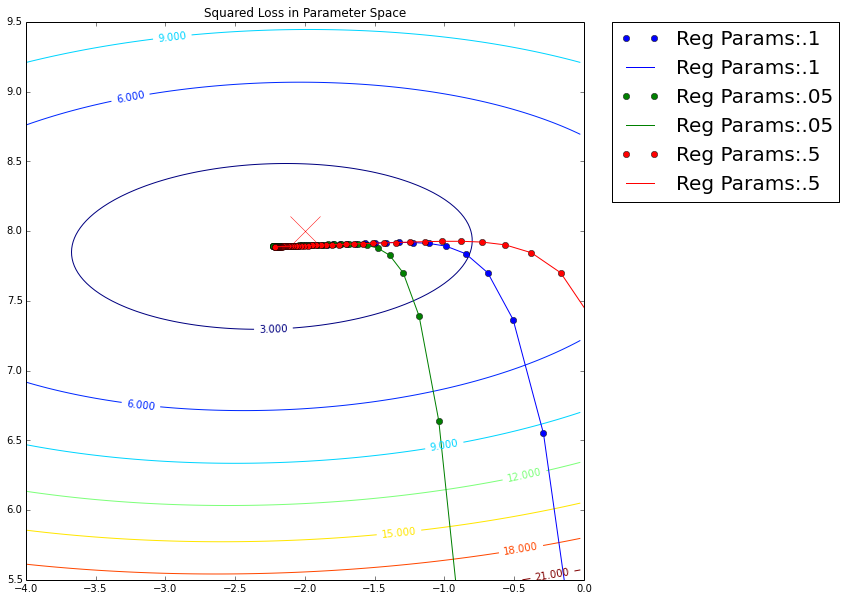

In [88]:
plt.figure(figsize = (10, 10))
CS = plt.contour(Beta_0, Beta_1, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Squared Loss in Parameter Space')

#plot true betas
plt.plot([-2,1],[8,10], 'rx',markersize=30)

finalBetas, allBetaZerosRidge,allBetaOnesRidge = linearRegressionGDReg(parsedData, 
                                                             iterations=50, 
                                                             learningRate = 0.05, 
                                                             regParam=0.1, 
                                                             regType="Ridge")

plt.plot(np.array(allBetaZerosRidge),np.array(allBetaOnesRidge), 'bo', np.array(allBetaZerosRidge),np.array(allBetaOnesRidge), 'b',label="Reg Params:.1")

finalBetas, allBetaZerosRidge,allBetaOnesRidge = linearRegressionGDReg(parsedData, 
                                                             iterations=50, 
                                                             learningRate = 0.05, 
                                                             regParam=0.05, 
                                                             regType="Ridge")

plt.plot(np.array(allBetaZerosRidge),np.array(allBetaOnesRidge), 'go', np.array(allBetaZerosRidge),np.array(allBetaOnesRidge), 'g',label="Reg Params:.05")


finalBetas, allBetaZerosRidge,allBetaOnesRidge = linearRegressionGDReg(parsedData, 
                                                             iterations=50, 
                                                             learningRate = 0.05, 
                                                             regParam=0.5, 
                                                             regType="Ridge")

plt.plot(np.array(allBetaZerosRidge),np.array(allBetaOnesRidge), 'ro', np.array(allBetaZerosRidge),np.array(allBetaOnesRidge), 'r',label="Reg Params:.5")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
#limit boundaries
plt.ylim(5.5,9.5)
plt.xlim(-4,0)
plt.show()

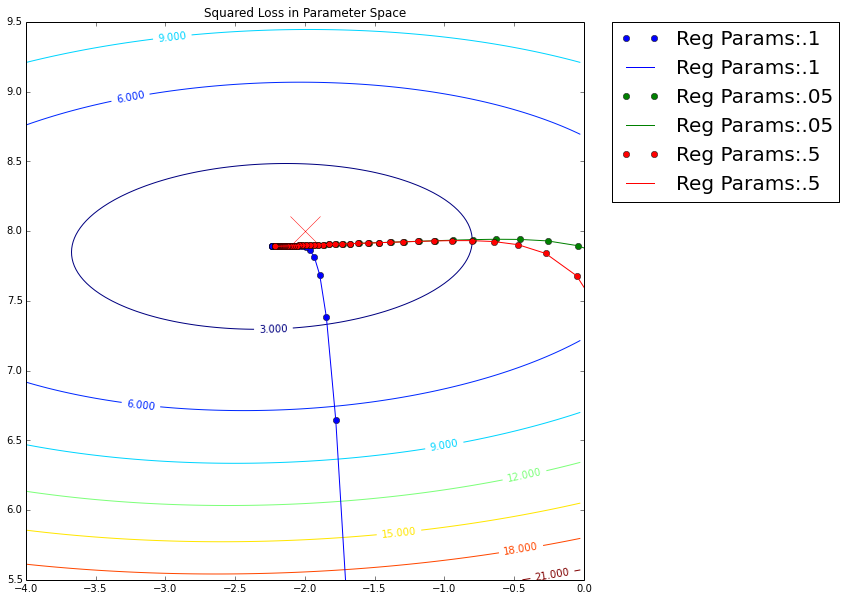

In [89]:
plt.figure(figsize = (10, 10))
CS = plt.contour(Beta_0, Beta_1, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Squared Loss in Parameter Space')

#plot true betas
plt.plot([-2,1],[8,10], 'rx',markersize=30)

finalBetas, allBetaZerosRidge,allBetaOnesRidge = linearRegressionGDReg(parsedData, 
                                                             iterations=50, 
                                                             learningRate = 0.05, 
                                                             regParam=0.1, 
                                                             regType="Lasso")

plt.plot(np.array(allBetaZerosRidge),np.array(allBetaOnesRidge), 'bo', np.array(allBetaZerosRidge),np.array(allBetaOnesRidge), 'b',label="Reg Params:.1")

finalBetas, allBetaZerosRidge,allBetaOnesRidge = linearRegressionGDReg(parsedData, 
                                                             iterations=50, 
                                                             learningRate = 0.05, 
                                                             regParam=0.05, 
                                                             regType="Lasso")

plt.plot(np.array(allBetaZerosRidge),np.array(allBetaOnesRidge), 'go', np.array(allBetaZerosRidge),np.array(allBetaOnesRidge), 'g',label="Reg Params:.05")


finalBetas, allBetaZerosRidge,allBetaOnesRidge = linearRegressionGDReg(parsedData, 
                                                             iterations=50, 
                                                             learningRate = 0.05, 
                                                             regParam=0.5, 
                                                             regType="Lasso")

plt.plot(np.array(allBetaZerosRidge),np.array(allBetaOnesRidge), 'ro', np.array(allBetaZerosRidge),np.array(allBetaOnesRidge), 'r',label="Reg Params:.5")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
#limit boundaries
plt.ylim(5.5,9.5)
plt.xlim(-4,0)
plt.show()